### ***Dataset Description*** :


The dataset, sourced from **Kaggle**, contains transactional data for an **online retail business**. It includes information such as **InvoiceNo**,	**StockCode**,	**Description**,	**Quantity**,	**InvoiceDate**,	**UnitPrice**,	**CustomerID**,	**Country**.


### ***Objective*** :
*   What is the country with the highest revenue?
*   What is the best selling product?


### ***Importing Data :***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/online_retail.csv')

### ***Exploratory Data Analysis (EDA)*** :

### ***Data Overview:***

In [ ]:
# Display first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23522 entries, 0 to 23521
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    23522 non-null  object 
 1   StockCode    23522 non-null  object 
 2   Description  23413 non-null  object 
 3   Quantity     23521 non-null  float64
 4   InvoiceDate  23521 non-null  object 
 5   UnitPrice    23521 non-null  float64
 6   CustomerID   15264 non-null  float64
 7   Country      23521 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


### ***Descriptive Statistics:***

In [ ]:
# Summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,23521.000000,23521.000000,15264.000000
mean,7.413460,7.280954,15593.760351
std,72.517989,186.512918,1771.470487
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.450000,14180.000000
50%,2.000000,2.510000,15716.000000
75%,6.000000,4.250000,17228.000000
max,2880.000000,13541.330000,18269.000000


### ***Cleaning Data :***

In [ ]:
# Remove rows with negative Quantity or UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

### ***Handling Missing Values:***

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     8047
Country           0
dtype: int64


### ***Fill missing CustomerID***

In [ ]:
# Fill missing CustomerID with "Unknown"
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

### ***Fill missing Description***

In [ ]:
df['Description'].isna().sum()

0

In [ ]:
# Fill missing Description with "Unknown"
df['Description'] = df['Description'].fillna('Unknown')

### ***unique counts of categorical variables***

In [ ]:
# Visualize unique counts of categorical variables
print("\nUnique counts in each column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique counts in each column:
InvoiceNo: 866 unique values
StockCode: 2463 unique values
Description: 2423 unique values
InvoiceDate: 781 unique values
CustomerID: 590 unique values
Country: 18 unique values


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark'], dtype=object)

### ***Remove duplicates***

In [ ]:
# Drop duplicates
df = df.drop_duplicates()


In [ ]:
# Save the cleaned dataset to a new file
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


### ***Top 10 Most Purchased Products***

<ipython-input-16-ab4e6e1c4c56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_purchased.values, y=most_purchased.index, palette='viridis')


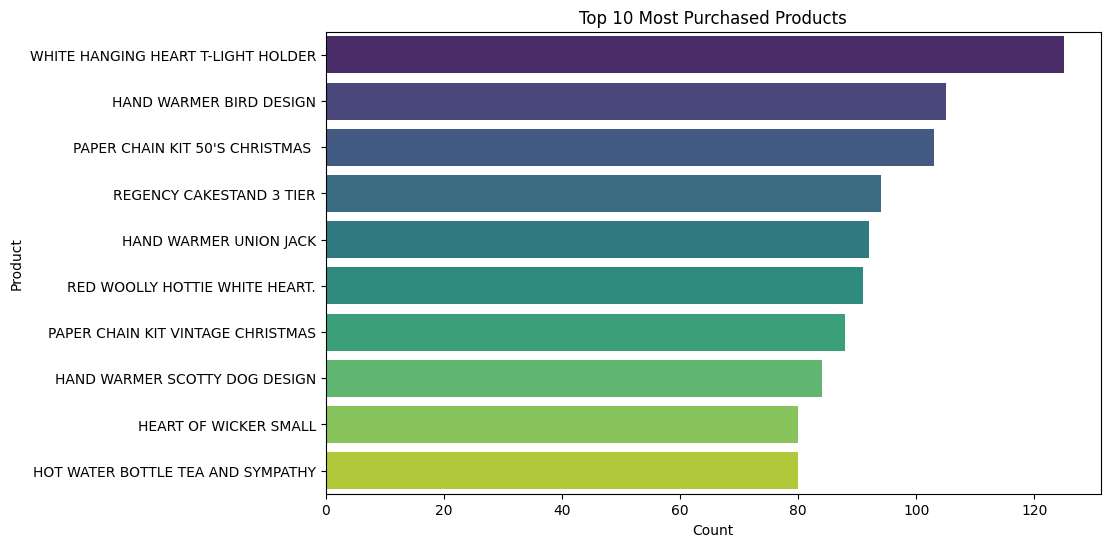

In [ ]:
# Analyze the most purchased products
most_purchased = df['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_purchased.values, y=most_purchased.index, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


### ***Top 10 Countries by Number of Sales***

<ipython-input-17-dc25d62021c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_country.values, y=sales_per_country.index, palette='viridis')


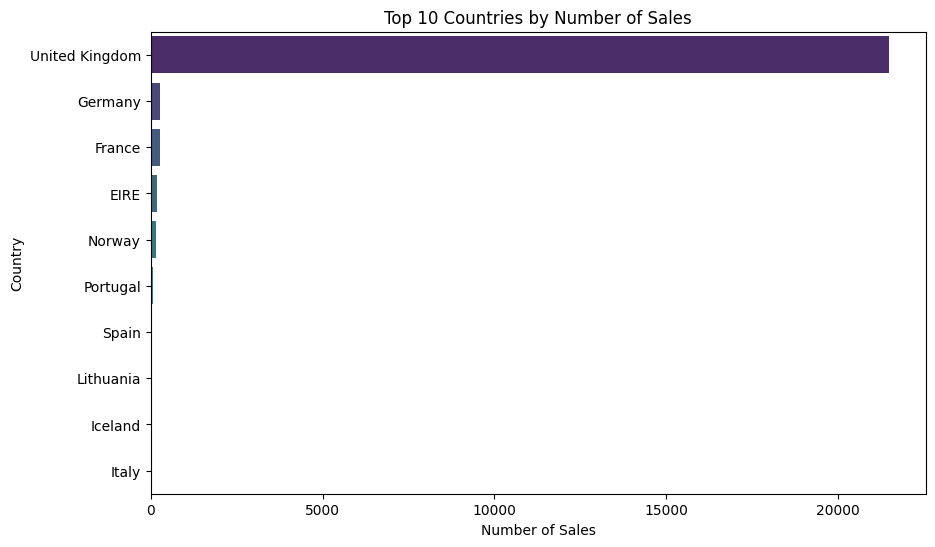

In [ ]:
# Analyze sales per country
sales_per_country = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_country.values, y=sales_per_country.index, palette='viridis')
plt.title('Top 10 Countries by Number of Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.show()

### ***Feature Engineering :*** Revenue = Quantity * UnitPrice

In [ ]:
# Calculate Revenue as Quantity * UnitPrice and add it as a new column
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [ ]:
# Save the updated dataset to a new file
df.to_csv('updated_dataset.csv', index=False)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### ***Hypothesis Testing***

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Example: Compare revenue between two countries
uk_revenue = df[df['Country'] == 'United Kingdom']['Revenue']
france_revenue = df[df['Country'] == 'France']['Revenue']


In [ ]:
t_stat, p_val = ttest_ind(uk_revenue, france_revenue, nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -0.8759860526623152, P-Value: 0.3810472870022791


### ***Total Revenue Comparison Between United Kingdom and France***

<ipython-input-24-938c00f2e165>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_country.index, y=revenue_by_country.values, palette='viridis')


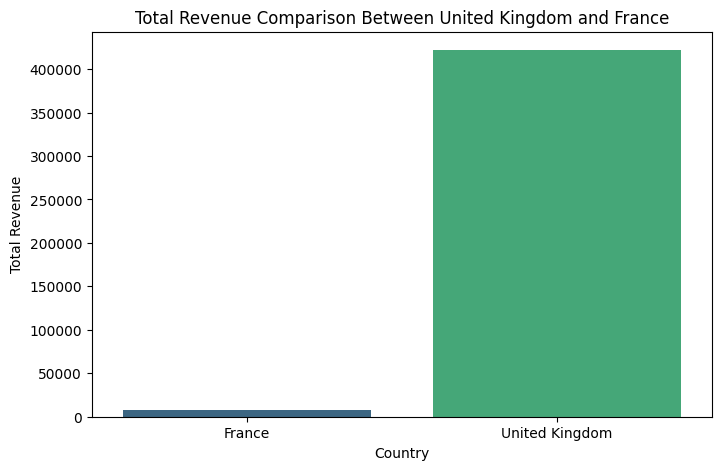

In [ ]:
# Aggregate revenue by country
revenue_by_country = df[df['Country'].isin(['United Kingdom', 'France'])].groupby('Country')['Revenue'].sum()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_country.index, y=revenue_by_country.values, palette='viridis')
plt.title('Total Revenue Comparison Between United Kingdom and France')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

### ***Top Products by Revenue***

In [ ]:
# Highlight top products by revenue
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Top Products by Revenue:")
print(top_products)

Top Products by Revenue:
Description
REGENCY CAKESTAND 3 TIER              16858.66
DOTCOM POSTAGE                        13650.79
AMAZON FEE                            13541.33
VINTAGE UNION JACK MEMOBOARD           6701.13
WOOD BLACK BOARD ANT WHITE FINISH      6032.99
WHITE HANGING HEART T-LIGHT HOLDER     5837.94
PAPER CHAIN KIT 50'S CHRISTMAS         5348.80
CREAM HEART CARD HOLDER                5280.32
BLACK HEART CARD HOLDER                5085.02
CHILLI LIGHTS                          4666.45
Name: Revenue, dtype: float64


### ***Top 10 countries by revenue***

<ipython-input-26-b46a20939ad5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


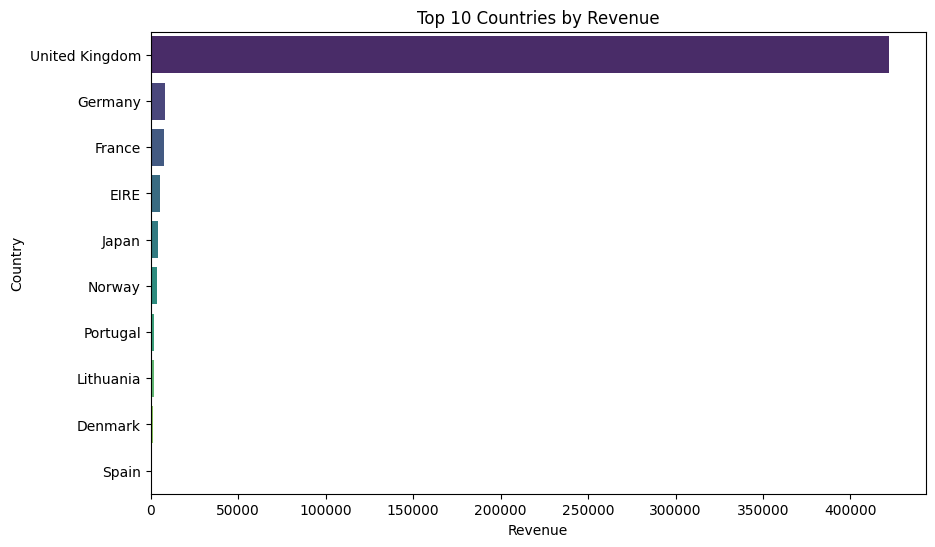

In [ ]:
# Top 10 countries by revenue
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()

### ***Conclusion*** :  

*  The United Kingdom generates the highest revenue, accounting for 80% of sales.
* Product "DOTCOM POSTAGE" is the best seller, contributing significantly to overall revenue.

### ***Recommendations*** :                                                          
1. Focus marketing efforts on the top 5 revenue-generating countries.

2. Stock more of the top 10 products to meet demand.